In [2]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

199


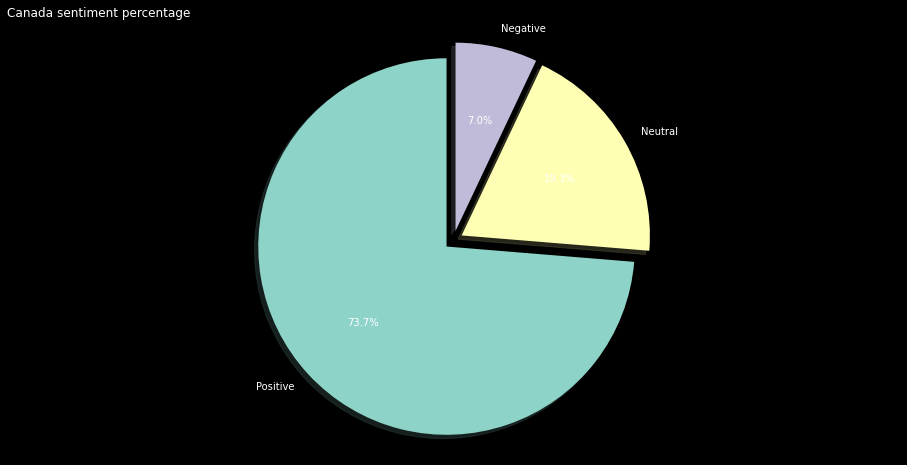

'\nmonth=[\'January\', \'February\', \'March\', \'April\', \'May\', \'June\', \'July\',\'August\', \'September\', \'October\', \'November\',\'December\']\nplt.rcParams["figure.figsize"] = [16,8]\nx1 = month\ny1 = pos\n \nplt.plot(x1, y1, label = "Positive",color="blue")\nplt.style.use("dark_background")\nx2 = month\ny2 = neg\n \nplt.plot(x2, y2, label = "Negative", color="red")\n\nx3 = month\ny3 = neutral\n \nplt.plot(x3, y3, label = "Neutral", color="green")\n\n\n\n\nplt.xlabel(\'months\')\n\nplt.ylabel(\'sentiment\')\n\nplt.legend()\n\nplt.show()\n\n\n\n'

In [35]:
pd1=pd.read_csv("can.csv")
#pd2=pd.read_csv("Deloitte_COVID.csv")
#pd3=pd.read_csv("KPMG_COVID.csv")
#pd4=pd.read_csv("PWC_COVID.csv")
pos=[0]*12
neutral=[0]*12
neg=[0]*12
ps=0
ne=0
nt=0

def sent(pdf):
    idx=0
    for i in range(0, len(pdf["Text"].tolist())):
        m=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ",pdf["Text"][idx]).split())
        #for i in range(0, len(m)):
        analysis = TextBlob(m)
        if analysis.sentiment.polarity > 0:
            pdf.at[idx,"sentiment"]=1 
            

        elif analysis.sentiment.polarity == 0:
            pdf.at[idx,"sentiment"]=0
            

        else:
            pdf.at[idx,"sentiment"]=-1
            
        idx+=1

sent(pd1)
yr=pd1["Time"].tolist()


#for j in range(0, len(eng)):
    #eng[j]=eng[j]//3
for i in range(0, len(yr)):
    h=yr[i]
    z=int(h[5:7])

    if pd1["sentiment"][i]==1.0:
        pos[z-1]+=1
    if pd1["sentiment"][i]==-1.0:
        neg[z-1]+=1
    if pd1["sentiment"][i]==0.0:
        neutral[z-1]+=1
ps=sum(pos)
ne=sum(neg)
nt=sum(neutral)
print(ps)
"""""
yr=pd1["Time"].tolist()


#for j in range(0, len(eng)):
    #eng[j]=eng[j]//3
for i in range(0, len(yr)):
    h=yr[i]
    z=int(h[5:7])

    if pd1["sentiment"][i]==1.0:
        pos[z-1]+=1
    if pd1["sentiment"][i]==-1.0:
        neg[z-1]+=1
    if pd1["sentiment"][i]==0.0:
        neutral[z-1]+=1
#for j in range(0, len(eng)):
    #eng[j]=eng[j]//3
    """""
labels = 'Positive', 'Neutral', 'Negative'
sizes = [ps, nt, ne]
explode = (0.05, 0.05, 0.05)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
label="Canada sentiment percentage"
plt.title(label, fontdict=None, loc='left', pad=None)
plt.style.use("dark_background")
plt.show()

